In [1]:
import requests
import numpy as np
import pandas as pd
import os
import ffmpeg
import subprocess
import json

In [3]:
!pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=2d4996c73bd59e2f3844615d851b449f73ac1de2f2af5e37af760a76ad5c07cb
  Stored in directory: /home/cheng-ubuntu/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [2]:
class NHLDataDownloader:
    def __init__(self, season, data_dir='data'):
        self._season = None
        self.season = season
        self.data_dir = data_dir

        # codes for types of games
        self.pre_season = '01'
        self.reg_season = '02'
        self.playoffs = '03'
        self.all_star = '04'

        # urls
        self.base_url = 'https://statsapi.web.nhl.com/api/v1/game/'
        self.end_base_url = '/feed/live/'
        self.cache_file = os.path.join(self.data_dir, f'nhl_play_by_play_{self.season}.json')

    @property
    def season(self):
        return self._season

    @season.setter
    def season(self, value):
        self._season = value

        # Update nb_games_reg_season based on the new season value
        if int(self.season) < 2017:
            self.nb_games_reg_season = 1230
        elif 2017 <= int(self.season) <= 2020:
            self.nb_games_reg_season = 1271
        else:
            self.nb_games_reg_season = 1353

    def download_nhl_data(self, game_id: str):
        """
        Creates and saves a .json file of the play-by-play of a game (defined by the game ID, aka game_id) in the
        specified directory. If the file has already been downloaded there before, it skips it and continues on to
        the next one.

        Some playoff games have a .json file even though that game never took place (example: games 6 and 7 of a series
        that finished 4-1 have existing files but without data in it). This function filters them out by checking the
        nested value of 'status'. If the value is "Final", the game happened.
        """
        if os.path.exists(f'nhl_play_by_play_{self.season}_{game_id}.json'):
            with open(self.cache_file, 'r') as file:
                return True  # json.load(file)

        os.makedirs(self.data_dir, exist_ok=True)
        url = f'{self.base_url}{game_id}{self.end_base_url}'
        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()
            detailed_state = data.get('gameData', {}).get('status', {}).get('detailedState', '')
            if detailed_state == 'Final':
                with open(f'{self.data_dir}/nhl_play_by_play_{self.season}_{game_id}.json', 'w') as file:
                    json.dump(data, file)
                return True  # data
            else:
                print(f"Skipping download for game ID {game_id} as detailedState is not 'Final'")
                return False
        else:
            print(f"Failed to download data for game ID {game_id}")
            return False

    def get_nhl_data_season(self):
        """
        Loops through all the games of a given regular season and creates the appropriate game ID in each loop.
        """
        for i in range(1, self.nb_games_reg_season + 1):
            game_id = f'{self.season}{self.reg_season}{i:04}'
            self.download_nhl_data(game_id)

    def get_nhl_data_playoffs(self):
        """
        Loops through all the games of a given playoff season and creates the appropriate game ID in each loop.

        It checks if a game is possible and updates the value accordingly (example: game 8 of matchup 2 in round 1 isn't
        possible, or game 1 of matchup 10 in round 1 sin't possible, or game 1 of matchup 1 of round 5 also isn't
        possible).
        """
        round = 1
        matchup = 1
        game = 1

        for i in range(105):  # maximum number of possible playoff games is 105
            game_id = f'{self.season}{self.playoffs}0{round}{matchup}{game}'
            downloaded = self.download_nhl_data(game_id)
            game += 1
            if game > 7 or not downloaded:
                matchup += 1
                game = 1

            if matchup > 8 and round == 1 or \
                    matchup > 4 and round == 2 or \
                    matchup > 2 and round == 3 or \
                    matchup > 1 and round == 4:
                round += 1
                matchup = 1
                game = 1

            if round > 4:
                return


if __name__ == '__main__':
    # Set the seasons and data directory
    nhl_season_start = 2016  # USER INPUT HERE FOR START YEAR
    nhl_season_end = 2020  # USER INPUT HERE FOR END YEAR
    data_directory = 'nhl_data'  # USER INPUT HERE FOR FOLDER WHERE DATA WILL BE SAVED

    # Create an instance of NHLPlayByPlayDownloader
    nhl_downloader = NHLDataDownloader(str(nhl_season_start), data_directory)

    # download NHL play-by-play data for the specified seasons
    for i in range(nhl_season_start, nhl_season_end + 1):
        nhl_downloader.season = str(i)
        nhl_downloader.get_nhl_data_season()
        nhl_downloader.get_nhl_data_playoffs()

    # Now you can work with the play-by-play data as needed

Skipping download for game ID 2016030117 as detailedState is not 'Final'
Skipping download for game ID 2016030127 as detailedState is not 'Final'
Skipping download for game ID 2016030137 as detailedState is not 'Final'
Skipping download for game ID 2016030146 as detailedState is not 'Final'
Skipping download for game ID 2016030155 as detailedState is not 'Final'
Skipping download for game ID 2016030166 as detailedState is not 'Final'
Skipping download for game ID 2016030175 as detailedState is not 'Final'
Skipping download for game ID 2016030187 as detailedState is not 'Final'
Skipping download for game ID 2016030217 as detailedState is not 'Final'
Skipping download for game ID 2016030237 as detailedState is not 'Final'
Skipping download for game ID 2016030327 as detailedState is not 'Final'
Skipping download for game ID 2016030417 as detailedState is not 'Final'
Skipping download for game ID 2017030116 as detailedState is not 'Final'
Skipping download for game ID 2017030137 as detaile

In [1]:
import ipywidgets as widgets

In [2]:
pip install ipywidgets

  Obtaining dependency information for ipywidgets from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~=4.0.9 from https://files.pythonhosted.org/packages/29/03/107d96077c4befed191f7ad1a12c7b52a8f9d2778a5836d59f9855c105f6/widgetsnbextension-4.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for jupyterlab-widgets~=3.0.9 from https://files.pythonhosted.org/packages/e8/05/0ebab152288693b5ec7b339aab857362947031143b282853b4c2dd4b5b40/jupyterlab_widgets-3.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 7.4 MB/s eta 0:00:000:00:01m eta 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import requests
from io import BytesIO

# Function to simulate event data (replace with actual data)
def get_event_data(game_id):
    return [(20, 40), (50, 30), (80, 60)]  # Sample event data: (x, y) coordinates

class NHLGameViewer:
    def __init__(self):
        self.season_dropdown = widgets.Dropdown(
            options=['Regular Season', 'Playoffs'],
            description='Season:',
            disabled=False,
        )

        self.game_id_text = widgets.IntText(
            value=0,
            description='Game ID:',
            disabled=False
        )

        self.prev_button = widgets.Button(
            description='Previous Game',
            disabled=True,
            button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Go to the previous game',
            icon='arrow-left'  # (FontAwesome names without the `fa-` prefix)
        )

        self.next_button = widgets.Button(
            description='Next Game',
            disabled=True,
            button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
            tooltip='Go to the next game',
            icon='arrow-right'  # (FontAwesome names without the `fa-` prefix)
        )
        
        self.event_id_text = widgets.IntText(
            value=0,
            description='Event ID:',
            disabled=False
        )

        self.output = widgets.Output()

        self.prev_button.on_click(self.load_previous_game)
        self.next_button.on_click(self.load_next_game)
        self.season_dropdown.observe(self.update_game_ids, names='value')
        self.game_id_text.observe(self.update_game, names='value')
        self.event_id_text.observe(self.update_game, names='value')

        self.current_game_id = 0
        self.event_data = []

        self.update_game_ids()

    def update_game_ids(self, change=None):
        # Simulate getting game IDs based on season
        if self.season_dropdown.value == 'Regular Season':
            self.game_ids = [2016020001, 2016020002, 2016020003]  # Sample game IDs for regular season
        else:
            self.game_ids = [2016030111, 2016030112, 2016030113]  # Sample game IDs for playoffs

        self.game_id_text.max = len(self.game_ids)
        self.current_game_id = 1  # Start with the first game
        self.game_id_text.value = self.current_game_id
        self.update_game()

    def update_game(self, change=None):
        self.current_game_id = self.game_id_text.value
        self.load_game()

    def load_previous_game(self, button):
        if self.current_game_id > 1:
            self.current_game_id -= 1
            self.game_id_text.value = self.current_game_id
            self.load_game()

    def load_next_game(self, button):
        if self.current_game_id < len(self.game_ids):
            self.current_game_id += 1
            self.game_id_text.value = self.current_game_id
            self.load_game()

    def load_game(self):
        clear_output(wait=True)
        with self.output:
            game_id = self.game_ids[self.current_game_id - 1]
            print(f"Loading game {game_id}...")
            
            # Simulate getting event data for the game (replace with actual data)
            self.event_data = get_event_data(game_id)
            self.plot_ice_rink_with_events()

            self.prev_button.disabled = self.current_game_id == 1
            self.next_button.disabled = self.current_game_id == len(self.game_ids)

    def plot_ice_rink_with_events(self):
        # Load the ice rink image
        rink_image_url = 'https://github.com/udem-ift6758/project-template/tree/main/figures'  # Replace with the actual URL of the image
        rink_image = Image.open(BytesIO(requests.get(rink_image_url).content))

        plt.figure(figsize=(10, 5))
        plt.imshow(rink_image)
        plt.axis('off')

        if self.event_data:
            for event in self.event_data:
                x, y = event
                plt.plot(x, y, 'ro')  # Plot events as red dots
        else:
            plt.text(50, 50, 'No event coordinates available.', fontsize=12, ha='center')

        plt.show()

# Create the NHLGameViewer instance and display the widget
game_viewer = NHLGameViewer()
display(widgets.VBox([game_viewer.season_dropdown,
                      game_viewer.game_id_text,
                      game_viewer.prev_button,
                      game_viewer.next_button,
                      game_viewer.output]))


In [2]:
!pip install ipywidgets

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import requests
from io import BytesIO

# Function to simulate event data (replace with actual data)
# def get_event_data(game_id):
#     return [(20, 40), (50, 30), (80, 60)]  # Sample event data: (x, y) coordinates

season_dropdown = widgets.Dropdown(options=['Regular Season', 'Playoffs'],description='Season:',disabled=False)
game_id_text = widgets.IntText(value=0,description='Game ID:',disabled=False)
prev_button = widgets.Button(
    description='Previous Game',disabled=True,button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to the previous game',icon='arrow-left'  # (FontAwesome names without the `fa-` prefix)
)

next_button = widgets.Button(
    description='Next Game',disabled=True,button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to the next game',icon='arrow-right'  # (FontAwesome names without the `fa-` prefix)
)

output = widgets.Output()
prev_button.on_click(self.load_previous_game)
next_button.on_click(self.load_next_game)
season_dropdown.observe(self.update_game_ids, names='value')
game_id_text.observe(self.update_game, names='value')
current_game_id = 0
event_data = []
update_game_ids()

def update_game_ids(self, change=None):
    # Simulate getting game IDs based on season
    if self.season_dropdown.value == 'Regular Season':
        self.game_ids = [2016020001, 2016020002, 2016020003]  # Sample game IDs for regular season
    else:
        self.game_ids = [2016030111, 2016030112, 2016030113]  # Sample game IDs for playoffs

    self.game_id_text.max = len(self.game_ids)
    self.current_game_id = 1  # Start with the first game
    self.game_id_text.value = self.current_game_id
    self.update_game()

def update_game(self, change=None):
    self.current_game_id = self.game_id_text.value
    self.load_game()

def load_previous_game(self, button):
    if self.current_game_id > 1:
        self.current_game_id -= 1
        self.game_id_text.value = self.current_game_id
        self.load_game()

def load_next_game(self, button):
    if self.current_game_id < len(self.game_ids):
        self.current_game_id += 1
        self.game_id_text.value = self.current_game_id
        self.load_game()

def load_game(self):
    clear_output(wait=True)
    with self.output:
        game_id = self.game_ids[self.current_game_id - 1]
        print(f"Loading game {game_id}...")
        
        # Simulate getting event data for the game (replace with actual data)
        self.event_data = get_event_data(game_id)
        self.plot_ice_rink_with_events()

        self.prev_button.disabled = self.current_game_id == 1
        self.next_button.disabled = self.current_game_id == len(self.game_ids)

def plot_ice_rink_with_events(self):
    # Load the ice rink image
    rink_image_url = 'https://github.com/udem-ift6758/project-template/tree/main/figures'  # Replace with the actual URL of the image
    rink_image = Image.open(BytesIO(requests.get(rink_image_url).content))

    plt.figure(figsize=(10, 5))
    plt.imshow(rink_image)
    plt.axis('off')

    if self.event_data:
        for event in self.event_data:
            x, y = event
            plt.plot(x, y, 'ro')  # Plot events as red dots
    else:
        plt.text(50, 50, 'No event coordinates available.', fontsize=12, ha='center')

    plt.show()

# Create the NHLGameViewer instance and display the widget
game_viewer = NHLGameViewer()
display(widgets.VBox([game_viewer.season_dropdown,
                      game_viewer.game_id_text,
                      game_viewer.prev_button,
                      game_viewer.next_button,
                      game_viewer.output]))


In [14]:
import json

def get_event_data(game_id):
    file_path = "nhl_data/nhl_play_by_play_"+game_id[:4]+'_'+game_id+".json"
    data = json.load(file_path)
    
    return file_path#len(data)

game_id = str(2016020001)
get_event_data(game_id)

AttributeError: 'str' object has no attribute 'read'

In [4]:
import pandas as pd
df = pd.read_json("nhl_data/nhl_play_by_play_2016_2016020001.json")
# df['gameData'][6]
df.columns

Index(['copyright', 'gameData', 'gamePk', 'link', 'liveData', 'metaData'], dtype='object')

In [46]:
df['gameData']['venue']

{'id': 5031, 'name': 'Canadian Tire Centre', 'link': '/api/v1/venues/5031'}

In [5]:
df['liveData']['plays']['allPlays']#Events info

[{'about': {'dateTime': '2016-10-12T21:55:06Z',
   'eventId': 1,
   'eventIdx': 0,
   'goals': {'away': 0, 'home': 0},
   'ordinalNum': '1st',
   'period': 1,
   'periodTime': '00:00',
   'periodTimeRemaining': '20:00',
   'periodType': 'REGULAR'},
  'coordinates': {},
  'result': {'description': 'Game Scheduled',
   'event': 'Game Scheduled',
   'eventCode': 'OTT1',
   'eventTypeId': 'GAME_SCHEDULED'}},
 {'about': {'dateTime': '2016-10-12T23:14:45Z',
   'eventId': 2,
   'eventIdx': 1,
   'goals': {'away': 0, 'home': 0},
   'ordinalNum': '1st',
   'period': 1,
   'periodTime': '00:00',
   'periodTimeRemaining': '20:00',
   'periodType': 'REGULAR'},
  'coordinates': {},
  'result': {'description': 'Period Ready',
   'event': 'Period Ready',
   'eventCode': 'OTT2',
   'eventTypeId': 'PERIOD_READY'}},
 {'about': {'dateTime': '2016-10-12T23:18:19Z',
   'eventId': 5,
   'eventIdx': 2,
   'goals': {'away': 0, 'home': 0},
   'ordinalNum': '1st',
   'period': 1,
   'periodTime': '00:00',
   'p

In [42]:
df['gamePk']['plays']

2016020001

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

In [33]:
# Function to simulate event data (replace with actual data)
def get_event_data(game_id):
    game_id = str(game_id)
    file_path = "nhl_data/nhl_play_by_play_"+game_id[:4]+'_'+game_id+".json"
    df = pd.read_json(file_path)
    all_events = df['liveData']['plays']['allPlays']
    coordinates_list = []
    for i in range(len(all_events)):
        if all_events[i]['coordinates'] == {}:
            pass
        else:  
            coordonates_data = all_events[i]['coordinates']
            coordinates_list.append([coordonates_data['x'], coordonates_data['y']])
    return coordinates_list


In [ ]:
get_event_data(2016020001)
plot_ice_rink_with_events()

In [39]:
  # Sample event data: (x, y) coordinates

def update_game_ids(change=None):
    global game_ids, current_game_id
    if season_dropdown.value == 'Regular Season':
        game_ids = [2016020001, 2016020002, 2017020091]  # Sample game IDs for regular season
    else:
        game_ids = [2016030315, 2016030316, 2019030241]  # Sample game IDs for playoffs
    game_id_text.max = len(game_ids)
    current_game_id = 1
    game_id_text.value = current_game_id
    load_game()

def update_game(change=None):
    global current_game_id, current_event_id
    current_game_id = game_id_text.value
    current_event_id = event_id_text.value
    load_game()

def load_previous_game(button):
    global current_game_id
    if current_game_id > 1:
        current_game_id -= 1
        game_id_text.value = current_game_id
        load_game()

def load_next_game(button):
    global current_game_id
    if current_game_id < len(game_ids):
        current_game_id += 1
        game_id_text.value = current_game_id
        load_game()

def load_game():
    global event_data
    clear_output(wait=True)
    with output:
        game_id = game_ids[current_game_id - 1]
#         print(f"Loading game {game_id}...")
        
        # Simulate getting event data for the game (replace with actual data)
        event_data = get_event_data(game_id)
        plot_ice_rink_with_events()

        prev_button.disabled = current_game_id == 1
        next_button.disabled = current_game_id == len(game_ids)

def plot_ice_rink_with_events():
    # direct link to a PNG image
    rink_image_url = 'https://raw.githubusercontent.com/udem-ift6758/project-template/main/figures/nhl_rink.png'
    
    # Load the ice rink image
    response = requests.get(rink_image_url)
    
    # Check if the request was successful
    if response.status_code == 200:
        rink_image = Image.open(BytesIO(response.content))
        plt.figure(figsize=(10, 5))
        plt.imshow(rink_image)
        if event_data:
#         for event in event_data:
#             x, y = event
#             plt.plot(x, y, 'ro')  # Plot events as red dots
#         else:
#             plt.text(50, 50, 'No event coordinates available.', fontsize=12, ha='center')
#             plt.axis('off')
#             plt.show()
            x, y = event_data[event_id[0]]
            plt.plot(x, y, 'ro')  # Plot events as red dots
        else:
            plt.text(50, 50, 'No event coordinates available.', fontsize=12, ha='center')
            plt.axis('off')
            plt.show()
    else:
        print("Failed to retrieve the image.")

# Create widgets
season_dropdown = widgets.Dropdown(
    options=['Regular Season', 'Playoffs'],
    description='Season:',
    disabled=False,
)

game_id_text = widgets.IntText(
    value=0,
    description='Game ID:',
    disabled=False
)

event_id_text = widgets.IntText(
    value=1,
    description='Event ID:',
    disabled=False
)

prev_button = widgets.Button(
    description='Previous Game',
    disabled=True,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to the previous game',
    icon='arrow-left'  # (FontAwesome names without the `fa-` prefix)
)

next_button = widgets.Button(
    description='Next Game',
    disabled=True,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to the next game',
    icon='arrow-right'  # (FontAwesome names without the `fa-` prefix)
)

output = widgets.Output()

# Assign event handlers
prev_button.on_click(load_previous_game)
next_button.on_click(load_next_game)
season_dropdown.observe(update_game_ids, names='value')
game_id_text.observe(update_game, names='value')
event_id_text.observe(update_game, names='value')

# Initialize game data
game_ids = [2016020001]
event_id = [0]
current_game_id = 2016020001
event_data = []

# Display the widgets
update_game_ids()
display(widgets.VBox([season_dropdown, game_id_text, prev_button, next_button, output]))


Widget Javascript not detected.  It may not be installed or enabled properly.


In [22]:
def plot_ice_rink_with_events():
    # Load the ice rink image
    rink_image_url = 'https://github.com/udem-ift6758/project-template/tree/main/figures'  # Replace with the actual URL of the image
    rink_image = Image.open(BytesIO(requests.get(rink_image_url).content))

    plt.figure(figsize=(10, 5))
    plt.imshow(rink_image)
    plt.axis('off')

#     if event_data:
#         for event in event_data:
#             x, y = event
#             plt.plot(x, y, 'ro')  # Plot events as red dots
#     else:
#         plt.text(50, 50, 'No event coordinates available.', fontsize=12, ha='center')

    plt.show()

plot_ice_rink_with_events()

OSError: cannot identify image file <_io.BytesIO object at 0x11ea244c0>

In [40]:
  # Sample event data: (x, y) coordinates

# def update_game_ids(change=None):
#     global game_ids, current_game_id
#     if season_dropdown.value == 'Regular Season':
#         game_ids = [2016020001, 2016020002, 2017020091]  # Sample game IDs for regular season
#     else:
#         game_ids = [2016030315, 2016030316, 2019030241]  # Sample game IDs for playoffs
#     game_id_text.max = len(game_ids)
#     current_game_id = 1
#     game_id_text.value = current_game_id
#     load_game()

# def update_game(change=None):
#     global current_game_id, current_event_id
#     current_game_id = game_id_text.value
#     current_event_id = event_id_text.value
#     load_game()

def load_previous_game(button):
    global current_game_id
    if current_game_id > 1:
        current_game_id -= 1
        game_id_text.value = current_game_id
        load_game()

def load_next_game(button):
    global current_game_id
    if current_game_id < len(game_ids):
        current_game_id += 1
        game_id_text.value = current_game_id
        load_game()

# def load_game():
#     global event_data
#     clear_output(wait=True)
#     with output:
#         game_id = game_ids[current_game_id - 1]
# #         print(f"Loading game {game_id}...")
        
#         # Simulate getting event data for the game (replace with actual data)
#         event_data = get_event_data(game_id)
#         plot_ice_rink_with_events()

#         prev_button.disabled = current_game_id == 1
#         next_button.disabled = current_game_id == len(game_ids)

# def plot_ice_rink_with_events():
#     # direct link to a PNG image
#     rink_image_url = 'https://raw.githubusercontent.com/udem-ift6758/project-template/main/figures/nhl_rink.png'
    
#     # Load the ice rink image
#     response = requests.get(rink_image_url)
    
#     # Check if the request was successful
#     if response.status_code == 200:
#         rink_image = Image.open(BytesIO(response.content))
#         plt.figure(figsize=(10, 5))
#         plt.imshow(rink_image)
#         if event_data:
# #         for event in event_data:
# #             x, y = event
# #             plt.plot(x, y, 'ro')  # Plot events as red dots
# #         else:
# #             plt.text(50, 50, 'No event coordinates available.', fontsize=12, ha='center')
# #             plt.axis('off')
# #             plt.show()
#             x, y = event_data[event_id[0]]
#             plt.plot(x, y, 'ro')  # Plot events as red dots
#         else:
#             plt.text(50, 50, 'No event coordinates available.', fontsize=12, ha='center')
#             plt.axis('off')
#             plt.show()
#     else:
#         print("Failed to retrieve the image.")

# Create widgets
season_dropdown = widgets.Dropdown(
    options=['Regular Season', 'Playoffs'],
    description='Season:',
    disabled=False,
)

game_id_text = widgets.IntText(
    value=0,
    description='Game ID:',
    disabled=False
)

event_id_text = widgets.IntText(
    value=1,
    description='Event ID:',
    disabled=False
)

prev_button = widgets.Button(
    description='Previous Game',
    disabled=True,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to the previous game',
    icon='arrow-left'  # (FontAwesome names without the `fa-` prefix)
)

next_button = widgets.Button(
    description='Next Game',
    disabled=True,
    button_style='success',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Go to the next game',
    icon='arrow-right'  # (FontAwesome names without the `fa-` prefix)
)

output = widgets.Output()

# Assign event handlers
prev_button.on_click(load_previous_game)
next_button.on_click(load_next_game)
# season_dropdown.observe(update_game_ids, names='value')
# game_id_text.observe(update_game, names='value')
# event_id_text.observe(update_game, names='value')

In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

season_dropdown = widgets.Dropdown(
    options=['Regular Season', 'Playoffs'],
    description='Season:',
    disabled=False,
)
display(season_dropdown)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("tidied.csv")
season = '2016-2017'

# Select only the rows of the chosen season
season_df = df[df['Season'] == season]

# shot_data = season_df.groupby(['ShotType', 'Event']).size().unstack(fill_value=0)
season_df.head()

,GameID,Season,Event,Period,GameTime,Team,Goalie,IsEmptyNet,RinkSide,Shooter/Scorer,ShotType,Strength,XCoord,YCoord
0,2016020001,2016-2017,GOAL,1,08:21,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Wrist Shot,Even,-70.0,1.0
1,2016020001,2016-2017,GOAL,1,10:26,Ottawa Senators,Frederik Andersen,False,left,Bobby Ryan,Backhand,Even,82.0,3.0
2,2016020001,2016-2017,GOAL,1,12:49,Ottawa Senators,Frederik Andersen,False,left,Erik Karlsson,Slap Shot,Even,34.0,-1.0
3,2016020001,2016-2017,GOAL,1,14:18,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Snap Shot,Even,-76.0,-28.0
4,2016020001,2016-2017,GOAL,2,01:25,Toronto Maple Leafs,Craig Anderson,False,left,Auston Matthews,Wrist Shot,Even,76.0,-14.0


In [9]:
shot_categories = season_df['ShotType'].unique()
print(season_df['ShotType'].unique())

<class 'numpy.ndarray'>


In [14]:
def distance(df: pd.DataFrame) -> pd.DataFrame:
    right_goal = [89, 0]
    left_goal = [-89, 0]

    distance_to_goal = np.zeros(df.shape[0])
    for i, row in df.iterrows():
    
        if row['RinkSide'] == 'right':
            distance_to_goal[i] = np.sqrt((row['XCoord'] - left_goal[0])**2 + (row['YCoord'] - left_goal[1])**2).round()
        
        elif row['RinkSide'] == 'left':
            distance_to_goal[i] = np.sqrt((row['XCoord'] - right_goal[0])**2 + (row['YCoord'] - right_goal[1])**2).round()
    
        else:
            distance_to_goal[i] = None  # some games didn't have the information for which side the team was defending

    # add the column with its values
    df['distance_to_goal'] = distance_to_goal
    return df

distance_df = distance(season_df)
distance_df.head()

/tmp/ipykernel_6087/4065740579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_goal'] = distance_to_goal


,GameID,Season,Event,Period,GameTime,Team,Goalie,IsEmptyNet,RinkSide,Shooter/Scorer,ShotType,Strength,XCoord,YCoord,distance_to_goal
0,2016020001,2016-2017,GOAL,1,08:21,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Wrist Shot,Even,-70.0,1.0,19.0
1,2016020001,2016-2017,GOAL,1,10:26,Ottawa Senators,Frederik Andersen,False,left,Bobby Ryan,Backhand,Even,82.0,3.0,8.0
2,2016020001,2016-2017,GOAL,1,12:49,Ottawa Senators,Frederik Andersen,False,left,Erik Karlsson,Slap Shot,Even,34.0,-1.0,55.0
3,2016020001,2016-2017,GOAL,1,14:18,Toronto Maple Leafs,Craig Anderson,False,right,Auston Matthews,Snap Shot,Even,-76.0,-28.0,31.0
4,2016020001,2016-2017,GOAL,2,01:25,Toronto Maple Leafs,Craig Anderson,False,left,Auston Matthews,Wrist Shot,Even,76.0,-14.0,19.0


In [5]:
# Count the occurrences of each unique value
value_counts = distance_df['distance_to_goal'].value_counts()
# print(value_counts, distance_df['distance_to_goal'].max())

bins = [0, 10, 15, 25, 35, 45, 55, 190]#the reason to set bin like this is to average the number of events
labels = ['less than 10', '10-15', '15-25', '25-35', '35-45', '45-55', '55-190']
categories = pd.cut(distance_df['distance_to_goal'], bins=bins, labels=labels, include_lowest=True)

# Create a new Series with the associated category labels
categorized_series = pd.Series(categories, name='Category')
distance_df['distance_category'] = categorized_series


# table = pd.pivot_table(distance_df, index=['distance_category', 'ShotType'],columns=['Event'], aggfunc="sum")
# table
grouped = distance_df.groupby(['distance_category', 'ShotType', 'Event']).size().unstack(fill_value=0)

# Reshape the data using pivot_table to get the desired format
result = grouped.pivot_table(index='distance_category', columns='ShotType', values=['GOAL', 'SHOT'], fill_value=0)
# print(categorized_series)
# categorized_series.value_counts()
# distance_df.head()
result

/tmp/ipykernel_6087/419382086.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance_df['distance_category'] = categorized_series
/tmp/ipykernel_6087/419382086.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = distance_df.groupby(['distance_category', 'ShotType', 'Event']).size().unstack(fill_value=0)


Event                 GOAL                                                   \
ShotType          Backhand Deflected Slap Shot Snap Shot Tip-In Wrap-around   
distance_category                                                             
very Low             340.0      92.0      24.0     126.0  337.0        64.0   
low                  192.0      49.0      26.0     143.0  189.0         4.0   
medium                76.0      34.0      92.0     341.0  147.0         0.0   
Medium to high        12.0       7.0     168.0     300.0   18.0         1.0   
a little High          6.0       7.0     182.0     134.0    7.0         0.0   
high                   3.0       4.0     191.0      45.0    5.0         0.0   
very High             10.0       6.0     144.0      47.0   10.0         1.0   

Event                            SHOT                                        \
ShotType          Wrist Shot Backhand Deflected Slap Shot Snap Shot  Tip-In   
distance_category                                                             
very Low               800.0   1591.0     247.0      70.0     429.0  1127.0   
low                    710.0   1595.0     255.0     104.0     571.0  1112.0   
medium                 867.0   1412.0     185.0     390.0    1860.0   737.0   
Medium to high         548.0    593.0      44.0    1221.0    2731.0   136.0   
a little High          263.0    281.0      15.0    2303.0    2589.0    22.0   
high                   138.0    118.0      15.0    3996.0    1751.0    26.0   
very High              224.0    142.0      43.0    4580.0    1562.0    96.0   

Event                                     
ShotType          Wrap-around Wrist Shot  
distance_category                         
very Low                657.0     3075.0  
low                      80.0     3463.0  
medium                   18.0     6358.0  
Medium to high            1.0     7184.0  
a little High             3.0     7070.0  
high                      0.0     5170.0  
very High                10.0     5342.0

In [ ]:
grouped = distance_df.groupby(['distance_category', 'ShotType', 'Event']).size().unstack(fill_value=0)

# # Calculate the conversion rate (goal / shot) for each category and shot type
# grouped['conversion_rate'] = grouped['GOAL'] / (grouped['GOAL'] + grouped['SHOT'])

# # Reshape the data using pivot_table to get the desired format
# result = grouped.pivot_table(index='ShotType', columns='distance_category', values='conversion_rate', fill_value=0)

# # Display the result
# print(result)

In [9]:
result_df = distance_df.groupby('distance_to_goal')['Event'].value_counts()#.unstack().fillna(0)

# Rename columns for clarity
result_df.columns = ['shots', 'goals']

# Reset the index to make 'distance_to_goal' a column
# result_df = result_df.reset_index()
result_df.head()

distance_to_goal  Event
1.0               GOAL      4
                  SHOT      2
2.0               SHOT      5
                  GOAL      3
3.0               SHOT     26
Name: Event, dtype: int64

In [7]:
# result_df = distance_df.groupby('distance_to_goal').agg(
#     shots=('Event', lambda x: (x == 'SHOT').sum()),
#     goals=('Event', lambda x: (x == 'GOAL').sum())
# )
# # Calculate shot_goal_ratio
# result_df['goal_shot_ratio'] = result_df['shots'] / (result_df['goals'] + result_df['shots'])

# # Reset the index to get a clean DataFrame
# result_df.reset_index(inplace=True)
# result_df.head()

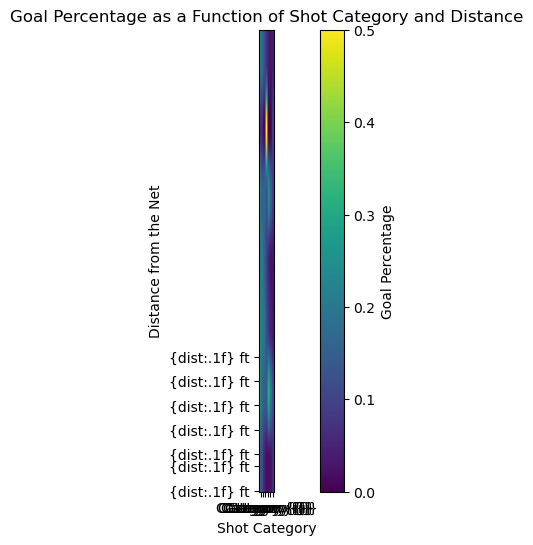

In [16]:
# Sample data (replace with actual data)
# Assume shot_distances, shot_categories, and goal_percentages are provided
# as arrays/lists with the respective data for a specific season.
shot_distances = distance_df['distance_to_goal']  # Example shot distances (random data)
shot_categories = distance_df['ShotType']  # Example shot categories (random data)
# goal_percentages = np.random.rand(100)  # Example goal percentages (random data)

# Binning shot distances and categories (adjust bins as needed)
distance_bins = np.array([0, 10, 15, 25, 35, 45, 55, 190])
category_bins = np.array([1, 2, 3, 4, 5, 6, 7])#the numbers represent different shot types['Backhand','Deflected','Slap Shot','Snap Shot','Tip-In','Wrap-around','Wrist Shot']

# Plot the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(result, cmap='viridis', extent=[category_bins.min(), category_bins.max(), distance_bins.max(), distance_bins.min()])
plt.colorbar(label='Goal Percentage')
plt.xlabel('Shot Category')
plt.ylabel('Distance from the Net')
plt.title('Goal Percentage as a Function of Shot Category and Distance')
plt.xticks(category_bins[:-1] + 0.5, ['Category {i}' for i in category_bins[:-1]])
plt.yticks(distance_bins[:-1] + 0.5, ['{dist:.1f} ft' for dist in distance_bins[:-1]])
plt.gca().invert_yaxis()  # Invert y-axis to have closer shots at the top
plt.show()


In [4]:
shot_categories = np.random.randint(0, 5, 100)
shot_categories

array([4, 3, 2, 4, 0, 0, 4, 1, 1, 1, 1, 4, 3, 0, 0, 1, 4, 4, 0, 3, 0, 4,
       3, 4, 2, 4, 3, 0, 3, 3, 1, 2, 3, 2, 4, 2, 4, 3, 0, 0, 1, 1, 1, 4,
       1, 3, 4, 4, 1, 4, 1, 4, 3, 1, 1, 3, 2, 0, 2, 1, 1, 1, 3, 2, 2, 2,
       4, 2, 3, 3, 0, 2, 3, 2, 3, 0, 4, 4, 0, 4, 4, 4, 1, 1, 3, 3, 4, 4,
       3, 4, 1, 1, 4, 4, 4, 4, 0, 3, 0, 0])